# LGM - Data science VIP

### Author : Jawahar R

## Task 3  Prediction using Decision Tree Algorithm

### Importing the libraries

In [209]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,10)

### Loading the dataset

In [31]:
#loading the dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.set_index('Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [34]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


it seems to be there is no missing values and outliers

### Missing value detection

In [35]:
#but for the sake checking those
#checking missing value
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Outlier detection

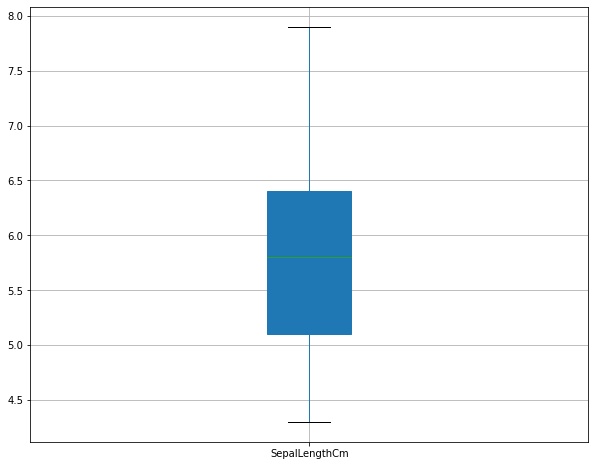

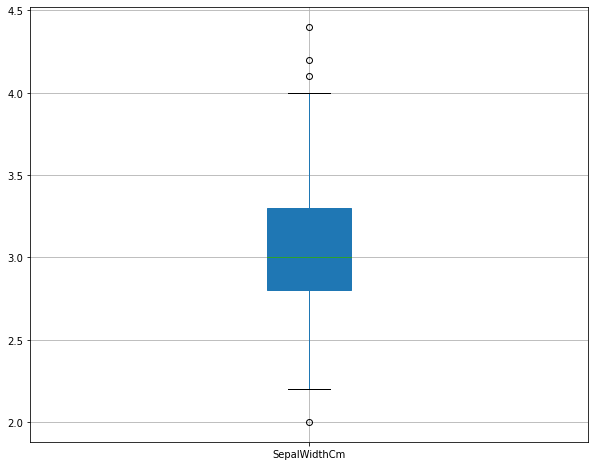

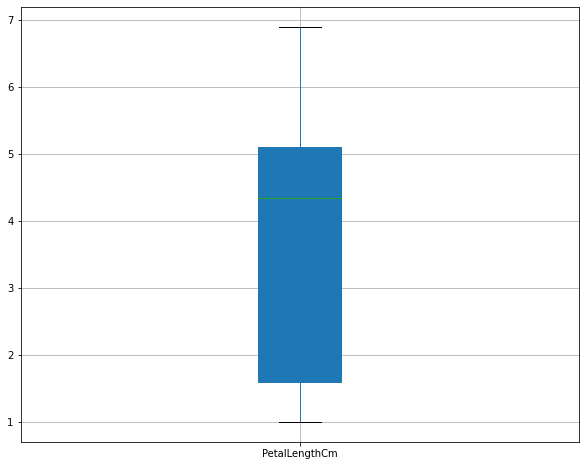

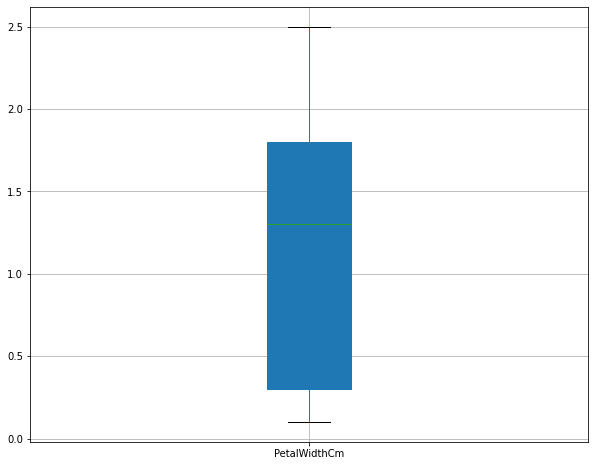

In [44]:
#checking oulier using boxplot
columns = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in columns:
    df.boxplot(column=i, patch_artist=True)
    plt.show()

the SepalWidthCm column having some outliers

### Imputing outliers with median values

In [57]:
# imputing the median value to those outier in SepalWidthCm
median = df['SepalWidthCm'].median()

In [53]:
#finding upper and lower limits using iqr
q1 = df.SepalWidthCm.quantile(0.25)
q3 = df.SepalWidthCm.quantile(0.75)
q1,q3

(2.8, 3.3)

In [54]:
IQR = q3 -q1
IQR

0.5

In [55]:
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR
lower_limit,upper_limit

(2.05, 4.05)

In [60]:
upper = np.where(df['SepalWidthCm'] >= upper_limit )
lower = np.where(df['SepalWidthCm'] <= lower_limit )

In [67]:
upper, lower

((array([15, 32, 33], dtype=int64),), (array([60], dtype=int64),))

In [107]:
df['SepalWidthCm'].iloc[[15,32,33,60]] = median


C:\Users\jawah\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [109]:
df.iloc[[15,32,33,60]]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
16,5.7,3.0,1.5,0.4,Iris-setosa
33,5.2,3.0,1.5,0.1,Iris-setosa
34,5.5,3.0,1.4,0.2,Iris-setosa
61,5.0,3.0,3.5,1.0,Iris-versicolor


C:\Users\jawah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


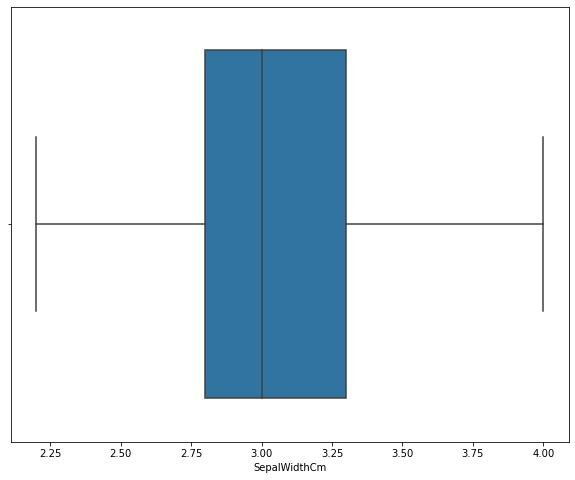

In [115]:
sns.boxplot(df['SepalWidthCm'])
plt.show()

Outliers are imputed with median value

### Correlation

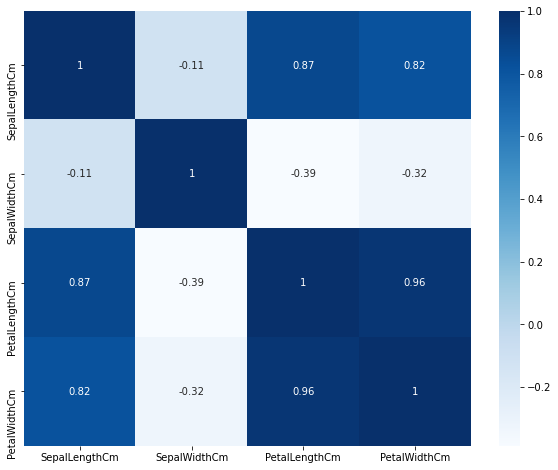

In [124]:
#well lets check correlation
sns.heatmap(df.corr(), annot= True, cmap='Blues')
plt.show()

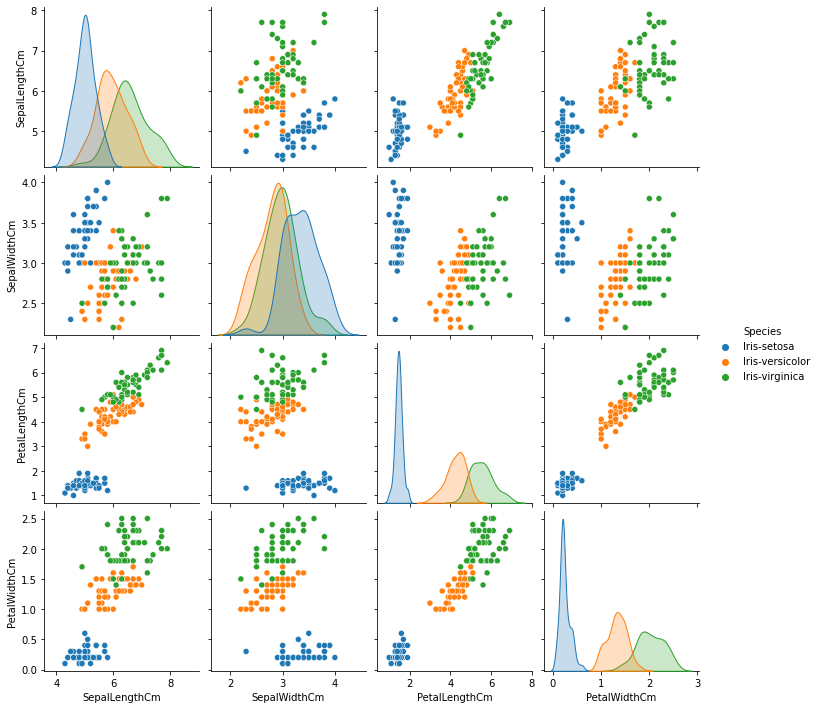

In [127]:
#pairplot
sns.pairplot(data=df,hue='Species')
plt.show()

### Label encoding


In [128]:
#categorical clean up
cleanup_category = {'Species' : {'Iris-setosa' : 1 , 'Iris-versicolor' : 2, 'Iris-virginica' :3}}
df.replace(cleanup_category, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


In [136]:
x = df.drop('Species', 1).values
y = df['Species'].values

### Splitting into train and test

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

### Model Building with Desicion Tree Classifier

In [215]:
# model building with desicion tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=7,max_depth=10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [216]:
print(classification_report(y_true=y_test,y_pred=y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy :",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy : 0.9777777777777777


### Visualization of tree

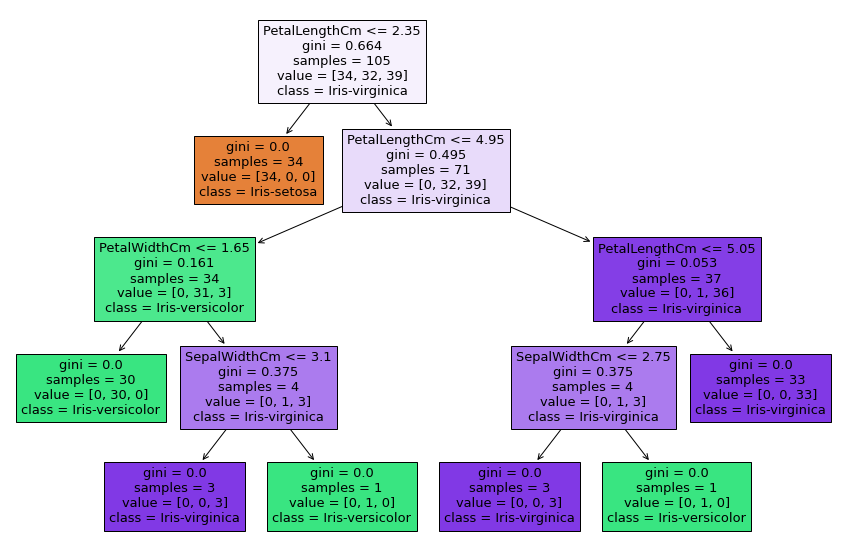

In [217]:
from sklearn import tree

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']

tree.plot_tree(model,feature_names=features,class_names=classes, filled=True)
plt.show()